In [6]:
import pyvista as pv
import pandas as pd
import matplotlib.pyplot as plt
import os

def charger_et_traiter_fichier(pvtu_path):
    # Lire le fichier PVTU
    data = pv.read(pvtu_path)

    # Afficher les noms des arrays de données disponibles
    print(f"Arrays disponibles dans {os.path.basename(pvtu_path)}: {data.point_data.keys()}")

    # Exemple d'extraction de données pour VELOC
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        print(f"Premières données VELOC : {veloc_data[:5]}")  # Afficher les premières données de vitesse

    # Ajouter d'autres traitements selon besoin pour DUDT, PRESS, QCRIT

# Chemin du dossier contenant les fichiers PVTU
chemin_dossier = 'vtk_1'

# Liste tous les fichiers .pvtu
fichiers_pvtu = [f for f in os.listdir(chemin_dossier) if f.endswith('.pvtu')]

# Boucle sur chaque fichier .pvtu
for fichier in fichiers_pvtu:
    pvtu_path = os.path.join(chemin_dossier, fichier)
    charger_et_traiter_fichier(pvtu_path)


Arrays disponibles dans channel_00000000.pvtu: ['DUDT ', 'PRESS', 'QCRIT', 'VELOC']
Premières données VELOC : [[0.37400956 0.00986795 0.00113755]
 [0.3409623  0.00745097 0.00545928]
 [0.35739304 0.00923972 0.0164079 ]
 [0.34470309 0.00453376 0.01557695]
 [0.37211933 0.00202802 0.00441786]]
Arrays disponibles dans channel_00000117.pvtu: ['AVVEL', 'DUDT ', 'PRESS', 'QCRIT', 'VELOC']
Premières données VELOC : [[ 0.34202412  0.00219849  0.00746619]
 [ 0.32499589  0.00291764  0.0075591 ]
 [ 0.3278138  -0.00279326  0.012052  ]
 [ 0.30040328  0.00103981  0.00936669]
 [ 0.3352915   0.00705334  0.01248889]]
Arrays disponibles dans channel_00000100.pvtu: ['AVVEL', 'DUDT ', 'PRESS', 'QCRIT', 'VELOC']
Premières données VELOC : [[ 3.54127314e-01  1.14668089e-02  1.22144310e-02]
 [ 3.27118843e-01  9.11458056e-03  1.22657252e-02]
 [ 3.34343490e-01 -1.46184789e-05  1.92542050e-03]
 [ 3.03535761e-01  2.97946241e-03 -3.56389667e-04]
 [ 3.57718792e-01 -1.67834177e-02  1.31243972e-02]]


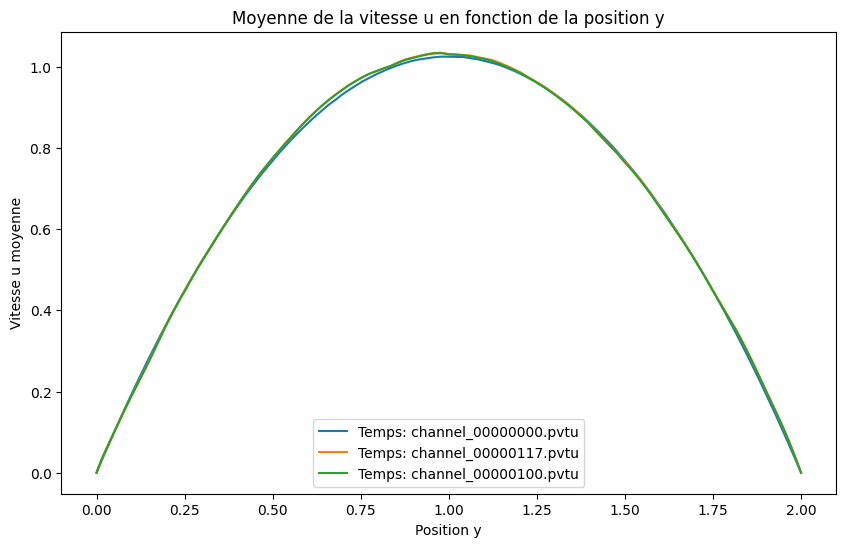

In [7]:
def calculer_moyenne_u(data):
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        u_component = veloc_data[:, 0]  # Composante u de la vitesse
        df = pd.DataFrame({
            'y': data.points[:, 1],
            'u': u_component
        })
        return df.groupby('y')['u'].mean()

plt.figure(figsize=(10, 6))
for fichier in fichiers_pvtu:
    pvtu_path = os.path.join(chemin_dossier, fichier)
    data = pv.read(pvtu_path)
    moyenne_u = calculer_moyenne_u(data)
    plt.plot(moyenne_u.index, moyenne_u, label=f'Temps: {fichier}')

plt.title('Moyenne de la vitesse u en fonction de la position y')
plt.xlabel('Position y')
plt.ylabel('Vitesse u moyenne')
plt.legend()
plt.show()


In [ ]:
dddd

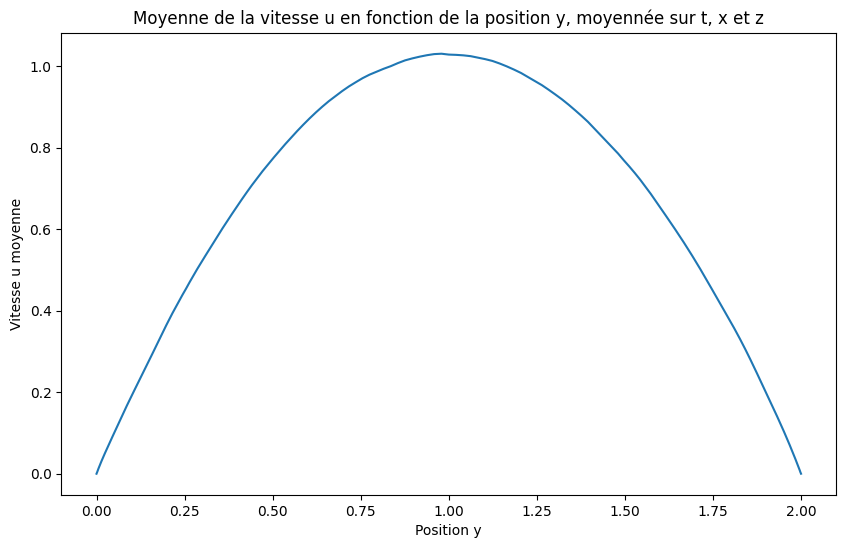

In [8]:
import pyvista as pv
import pandas as pd
import matplotlib.pyplot as plt
import os

def charger_et_traiter_fichier(pvtu_path):
    data = pv.read(pvtu_path)
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        u_component = veloc_data[:, 0]  # Composante u de la vitesse
        df = pd.DataFrame({
            'y': data.points[:, 1],  # Coordonnée y
            'u': u_component         # Composante u
        })
        return df
    return pd.DataFrame()  # Retourne un DataFrame vide si 'VELOC' n'est pas disponible

chemin_dossier = 'vtk_1'
fichiers_pvtu = [f for f in os.listdir(chemin_dossier) if f.endswith('.pvtu')]

all_data = pd.DataFrame()

for fichier in fichiers_pvtu:
    pvtu_path = os.path.join(chemin_dossier, fichier)
    df_temp = charger_et_traiter_fichier(pvtu_path)
    all_data = pd.concat([all_data, df_temp], ignore_index=True)

# Calcul de la moyenne sur toutes les mesures pour chaque position y
moyenne_u = all_data.groupby('y')['u'].mean()

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(moyenne_u.index, moyenne_u)
plt.title('Moyenne de la vitesse u en fonction de la position y, moyennée sur t, x et z')
plt.xlabel('Position y')
plt.ylabel('Vitesse u moyenne')
plt.show()


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv

def charger_et_traiter_fichier(pvtu_path):
    data = pv.read(pvtu_path)
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        u_component = veloc_data[:, 0]
        df = pd.DataFrame({
            'y': data.points[:, 1],
            'u': u_component
        })
        return df
    return pd.DataFrame()

def calculer_moyenne_groupes(chemin_dossier, groupe_fichiers):
    all_data = pd.DataFrame()
    for fichier in groupe_fichiers:
        pvtu_path = os.path.join(chemin_dossier, fichier)
        df_temp = charger_et_traiter_fichier(pvtu_path)
        all_data = pd.concat([all_data, df_temp], ignore_index=True)
    return all_data.groupby('y')['u'].mean()

chemin_dossier = 'vtk_1'
fichiers_pvtu = [f for f in os.listdir(chemin_dossier) if f.endswith('.pvtu')]

# Supposons que vos fichiers sont nommés avec une indication de temps comme 'time1', 'time2', etc.
groupes_temps = {'time1': [], 'time2': [], 'time3': []}
for fichier in fichiers_pvtu:
    for time_key in groupes_temps:
        if time_key in fichier:
            groupes_temps[time_key].append(fichier)

# Tracer les moyennes pour chaque groupe de temps
plt.figure(figsize=(10, 6))
for time_key, groupe_fichiers in groupes_temps.items():
    moyenne_u = calculer_moyenne_groupes(chemin_dossier, groupe_fichiers)
    plt.plot(moyenne_u.index, moyenne_u, label=f'Intervalle: {time_key}')

plt.title('Moyenne de la vitesse u en fonction de la position y, moyennée sur x, z et t')
plt.xlabel('Position y')
plt.ylabel('Vitesse u moyenne')
plt.legend()
plt.show()


KeyError: 'y'

<Figure size 1000x600 with 0 Axes>

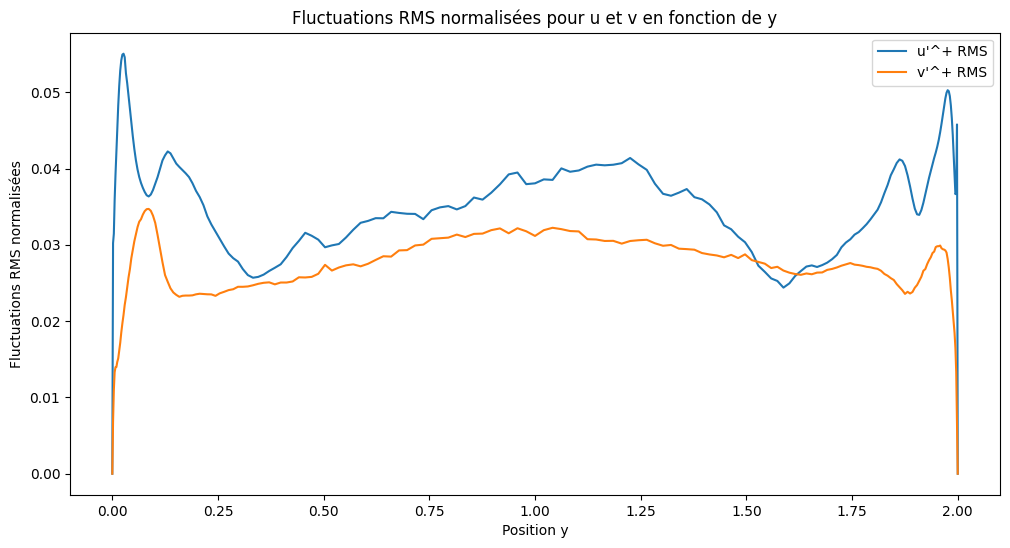

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv

def charger_et_traiter_fichier(pvtu_path):
    data = pv.read(pvtu_path)
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        df = pd.DataFrame({
            'y': data.points[:, 1],
            'u': veloc_data[:, 0],
            'v': veloc_data[:, 1]
        })
        return df
    return pd.DataFrame()

def calculer_rms_fluctuations(data, u_tau):
    grouped = data.groupby('y')
    u_rms = grouped['u'].apply(lambda u: np.sqrt(np.mean((u - u.mean())**2))) / u_tau
    v_rms = grouped['v'].apply(lambda v: np.sqrt(np.mean((v - v.mean())**2))) / u_tau
    return u_rms, v_rms

chemin_dossier = 'vtk_1'
fichiers_pvtu = [f for f in os.listdir(chemin_dossier) if f.endswith('.pvtu')]
all_data = pd.DataFrame()

for fichier in fichiers_pvtu:
    pvtu_path = os.path.join(chemin_dossier, fichier)
    df_temp = charger_et_traiter_fichier(pvtu_path)
    all_data = pd.concat([all_data, df_temp], ignore_index=True)

# Supposons que vous avez une estimation de la vitesse de cisaillement de paroi
u_tau = 0.5  # Cette valeur doit être déterminée ou donnée

# Calcul des fluctuations RMS normalisées
u_rms, v_rms = calculer_rms_fluctuations(all_data, u_tau)

# Tracé
plt.figure(figsize=(12, 6))
plt.plot(u_rms.index, u_rms, label='u\'^+ RMS')
plt.plot(v_rms.index, v_rms, label='v\'^+ RMS')
plt.title('Fluctuations RMS normalisées pour u et v en fonction de y')
plt.xlabel('Position y')
plt.ylabel('Fluctuations RMS normalisées')
plt.legend()
plt.show()


## Analyse des Fluctuations de Vitesse RMS Normalisées

Ce notebook présente le processus d'analyse des fluctuations de la vitesse quadratique moyenne (RMS), normalisées par la vitesse de cisaillement de paroi pour les composantes \(u\) et \(v\), à partir de données de simulation fluidique (CFD) enregistrées dans des fichiers PVTU.


Pour un Jupyter Notebook bien structuré, il est utile d'ajouter des explications via des cellules Markdown pour chaque section de code. Voici comment vous pourriez structurer votre notebook avec des cellules Markdown explicatives accompagnant les cellules de code correspondantes.

### Cellule Markdown 1 : Introduction

```markdown
## Analyse des Fluctuations de Vitesse RMS Normalisées

Ce notebook présente le processus d'analyse des fluctuations de la vitesse quadratique moyenne (RMS), normalisées par la vitesse de cisaillement de paroi pour les composantes \(u\) et \(v\), à partir de données de simulation fluidique (CFD) enregistrées dans des fichiers PVTU.
```

### Cellule de Code 1 : Importation des Bibliothèques

```python
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv
```

### Cellule Markdown 2 : Explication de la Fonction de Chargement des Données

```markdown
## Fonction de Chargement des Données

La fonction `charger_et_traiter_fichier` est utilisée pour lire les fichiers PVTU et extraire les données nécessaires. Elle renvoie un DataFrame contenant les coordonnées \(y\) et les composantes de vitesse \(u\) et \(v\). Si le fichier ne contient pas de données `VELOC`, un DataFrame vide est retourné.
```

### Cellule de Code 2 : Fonction pour Charger et Traiter les Fichiers

```python
def charger_et_traiter_fichier(pvtu_path):
    data = pv.read(pvtu_path)
    if 'VELOC' in data.point_data:
        veloc_data = data.point_data['VELOC']
        df = pd.DataFrame({
            'y': data.points[:, 1],
            'u': veloc_data[:, 0],
            'v': veloc_data[:, 1]
        })
        return df
    return pd.DataFrame()
```

### Cellule Markdown 3 : Calcul des Fluctuations RMS Normalisées

```markdown
## Calcul des Fluctuations RMS

La fonction `calculer_rms_fluctuations` calcule les fluctuations RMS pour les composantes de vitesse \(u\) et \(v\), et les normalise par la vitesse de cisaillement de paroi \(u_{\tau}\). Ces fluctuations sont importantes pour comprendre la stabilité et la turbulence dans le flux analysé.
```

### Cellule de Code 3 : Fonction de Calcul des Fluctuations RMS Normalisées

```python
def calculer_rms_fluctuations(data, u_tau):
    grouped = data.groupby('y')
    u_rms = grouped['u'].apply(lambda u: np.sqrt(np.mean((u - u.mean())**2))) / u_tau
    v_rms = grouped['v'].apply(lambda v: np.sqrt(np.mean((v - v.mean())**2))) / u_tau
    return u_rms, v_rms
```

### Cellule Markdown 4 : Chargement des Données et Tracé

```markdown
## Chargement des Données et Tracé des Graphiques

Les données sont chargées à partir de tous les fichiers PVTU spécifiés, et les fluctuations RMS normalisées sont calculées puis tracées pour chaque composante de vitesse. Ce graphique aidera à visualiser la variation des fluctuations de vitesse à travers la dimension verticale \(y\).
```

### Cellule de Code 4 : Chargement, Calcul et Tracé

```python
chemin_dossier = 'vtk'
fichiers_pvtu = [f for f in os.listdir(chemin_dossier) if f.endswith('.pvtu')]
all_data = pd.DataFrame()

for fichier in fichiers_pvtu:
    pvtu_path = os.path.join(chemin_dossier, fichier)
    df_temp = charger_et_traiter_fichier(pvtu_path)
    all_data = pd.concat([all_data, df_temp], ignore_index=True)

u_tau = 0.5  # Cette valeur doit être ajustée selon vos conditions de flux

u_rms, v_rms = calculer_rms_fluctuations(all_data, u_tau)

plt.figure(figsize=(12, 6))
plt.plot(u_rms.index, u_rms, label='u\'^+ RMS')
plt.plot(v_rms.index, v_rms, label='v\'^+ RMS')
plt.title('Fluctuations RMS normalisées pour u et v en fonction de y')
plt.xlabel('Position y')
plt.ylabel('Fluctuations RMS normalisées')
plt.legend()
plt.show()
```

En utilisant ce format, chaque étape du processus est clairement expliquée et documentée, rendant le notebook non seulement utile pour exécuter les analyses mais aussi pour servir de documentation éducative pour d'autres utilisateurs ou pour des révisions futures.

### Markdown Cell: Studying the Shear Stress Component \(-u'v'\)

```markdown
## Analyzing the Shear Stress Component \(-u'v'\)

The term \(-u'v'\) represents the Reynolds shear stress, which is a crucial component in the study of turbulent flows. This metric is derived from the fluctuating components of velocity in the \(u\) (horizontal) and \(v\) (vertical) directions. It provides insight into the momentum transfer due to turbulence between layers of fluid at different heights (given by coordinate \(y\)). By analyzing \(-u'v'\), we can gain a deeper understanding of the interaction between these layers, which is essential for models of turbulence and for predicting flow behaviors in engineering and environmental contexts.
```

### Code Cell: Function to Compute \(-u'v'\)

```python
def calculer_shear_stress(data):
    """Calculate the Reynolds shear stress component -u'v' from the grouped data."""
    # Group data by the 'y' coordinate to process each layer individually
    grouped = data.groupby('y')
    # Calculate -u'v' for each group
    uv_prime = grouped.apply(lambda df: -np.mean((df['u'] - df['u'].mean()) * (df['v'] - df['v'].mean())))
    return uv_prime
```

### Markdown Cell: Calculating and Plotting \(-u'v'\)

```markdown
## Calculating and Plotting the Shear Stress Component \(-u'v'\)

In this section, we calculate the Reynolds shear stress \(-u'v'\) for different vertical positions \(y\). This calculation will help visualize how turbulent momentum exchange varies with height in the flow field. By plotting this metric, we can observe potential patterns or anomalies in the shear distribution, which are indicative of the flow's turbulent structure.
```

### Code Cell: Load Data, Calculate Shear Stress, and Plot

```python
# Assuming 'all_data' contains all the necessary velocity data as previously loaded
shear_stress = calculer_shear_stress(all_data)

# Plotting the shear stress
plt.figure(figsize=(12, 6))
plt.plot(shear_stress.index, shear_stress, label='-u\'v\' Reynolds Shear Stress', color='red')
plt.title('Profile of Reynolds Shear Stress \(-u\'v\'\) as a Function of y')
plt.xlabel('Vertical Position y')
plt.ylabel('Shear Stress \(-u\'v\'\)')
plt.legend()
plt.grid(True)
plt.show()
```

By integrating this section into your Jupyter Notebook, you extend your analysis to include turbulent shear stresses, offering a comprehensive view of the dynamics within the turbulent flow. The calculation of \(-u'v'\) using group operations on the DataFrame leverages Python's powerful data manipulation capabilities to efficiently process and visualize complex flow characteristics. This approach not only enriches your analysis but also highlights how different components of the flow interact at various levels, providing a multidimensional view of turbulence.

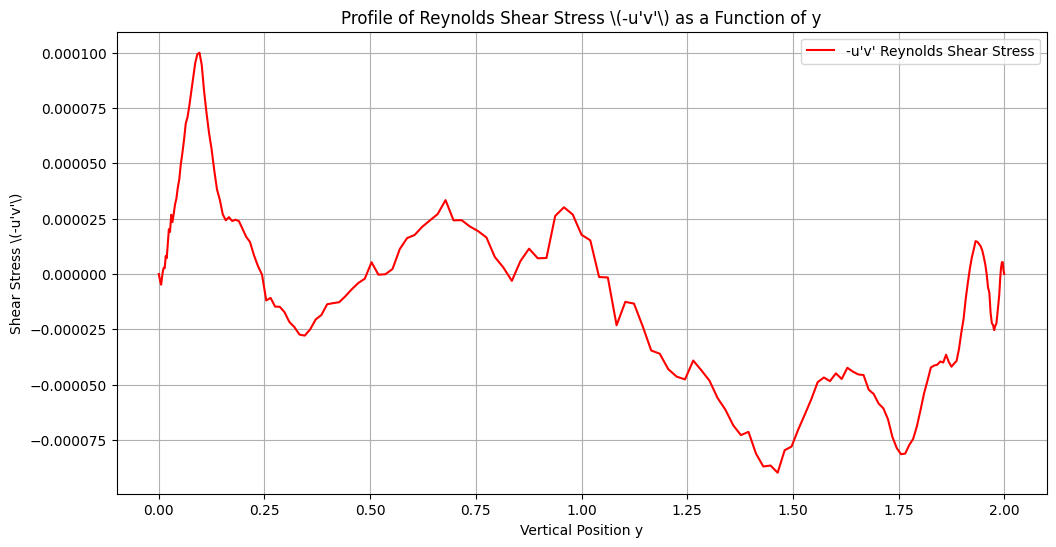

In [12]:


def calculer_shear_stress(data):
    """Calculate the Reynolds shear stress component -u'v' from the grouped data using include_groups=False to comply with future versions of pandas."""
    grouped = data.groupby('y')
    uv_prime = grouped.apply(lambda df: -np.mean((df['u'] - df['u'].mean()) * (df['v'] - df['v'].mean())), include_groups=False)
    return uv_prime



# Assuming 'all_data' contains all the necessary velocity data as previously loaded
shear_stress = calculer_shear_stress(all_data)

# Plotting the shear stress
plt.figure(figsize=(12, 6))
plt.plot(shear_stress.index, shear_stress, label='-u\'v\' Reynolds Shear Stress', color='red')
plt.title('Profile of Reynolds Shear Stress \(-u\'v\'\) as a Function of y')
plt.xlabel('Vertical Position y')
plt.ylabel('Shear Stress \(-u\'v\'\)')
plt.legend()
plt.grid(True)
plt.show()

# 1. Introduction

## Turbulent Flow Data Analysis

This notebook is dedicated to analyzing flow data from CFD simulations stored in PVTU format. Our focus will be on calculating various statistical measures that describe the flow characteristics. These include:

- Mean velocity component \( u \) averaged over \( x \), \( z \), and time \( t \) as a function of \( y \).
- The Reynolds shear stress component \( -u'v' \) averaged similarly.
- RMS fluctuations for velocity components \( u \) and \( v \), also averaged over \( x \), \( z \), and time \( t \).



# 2. Importation of Useful Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv
import scipy.stats as stats

print("Libraries imported successfully.")

Libraries imported successfully.


# 3. Data Loading

## Data Loading

In this section, we load the CFD simulation data from PVTU files located in a specified directory. Each file represents a snapshot of the flow at different times, allowing us to perform temporal and spatial analyses.

In [15]:
def load_data(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.pvtu')]
    data_frames = []
    for file in files:
        path = os.path.join(directory, file)
        data = pv.read(path)
        if 'VELOC' in data.point_data:
            veloc_data = data.point_data['VELOC']
            print(veloc_data)
            df = pd.DataFrame({
                'y': data.points[:, 1],
                'u': veloc_data[:, 0],
                'v': veloc_data[:, 1]
            })
            data_frames.append(df)
    all_data = pd.concat(data_frames, ignore_index=True)
    print(f"Loaded data from {len(files)} files.")
    return all_data

# Set the directory path where your PVTU files are stored
directory_path = 'vtk'
all_data = load_data(directory_path)

[[ 0.39154455 -0.04932011  0.00185399]
 [ 0.37682337 -0.06091374 -0.0046332 ]
 [ 0.38228756 -0.02080468  0.0309146 ]
 ...
 [ 0.52541018  0.01923828  0.03768874]
 [ 0.52068977  0.02268783  0.03698793]
 [ 0.51241288  0.02885059  0.03169182]]
[[ 0.46142686  0.01609107  0.06189249]
 [ 0.41923269  0.00893567  0.05003431]
 [ 0.47511059 -0.00792109  0.0647427 ]
 ...
 [ 0.63901334 -0.00428577  0.03535964]
 [ 0.62838576 -0.00399827  0.03919719]
 [ 0.61404753 -0.00344544  0.04321334]]
[[ 4.23285336e-01  7.35427969e-03  1.81162595e-02]
 [ 3.79897274e-01  6.16327847e-03  1.21830408e-02]
 [ 3.97331076e-01  6.61083743e-03 -6.73392249e-04]
 ...
 [ 4.41940682e-01 -8.68739977e-03  4.24695124e-04]
 [ 4.41793809e-01 -7.33673162e-03  2.38948773e-03]
 [ 4.38875798e-01 -3.99878249e-03  5.53866994e-03]]
[[ 0.29217628  0.05930129 -0.06982053]
 [ 0.30417197  0.06755596 -0.06261901]
 [ 0.36884929  0.03512268 -0.04696713]
 ...
 [ 0.76475039 -0.03630487  0.04229098]
 [ 0.72676983  0.00164358  0.03916234]
 [ 0.692

## 4. Velocity Normalization Using Wall Shear Velocity

In studies of near-wall turbulence, velocities are often normalized using the local friction velocity, $u_{\tau}$. This normalization is crucial for comparing turbulent flows under different conditions by scaling velocity to a non-dimensional form that highlights the dynamics driven by shear near the wall. The friction velocity is defined as $u_{\tau} = \sqrt{\frac{\tau_w}{\rho}}$, where $\tau_w$ is the wall shear stress and $\rho$ is the fluid density. This approach is based on the normalization used in the study by Jiménez and Moin (1991).




###  Calculating Wall Shear Stress from Velocity Data

To understand the dynamics of wall-bounded flows in fluid mechanics, it is crucial to calculate the wall shear stress, $\tau_w$. This stress is defined as $\tau_w = \mu \left.\frac{\partial u}{\partial y}\right|_{y=0}$, where $\mu$ is the dynamic viscosity of the fluid, and $\frac{\partial u}{\partial y}$ is the gradient of the velocity parallel to the wall (typically in the x-direction) at the wall itself. To estimate this gradient, we fit a line to the velocity data points near the wall and use the slope as $\frac{\partial u}{\partial y}$. This approach gives us an insight into the shear forces exerted by the fluid on the wall, which is pivotal for studies of turbulence and boundary layer behavior.

### Function to Compute Wall Shear Stress

The function `calculate_wall_shear_stress` performs a linear regression on the velocity data near the wall to estimate $\frac{\partial u}{\partial y}$ and calculates the wall shear stress using the formula $\tau_w = \mu \frac{\partial u}{\partial y}$. This is done only for a subset of data points that are close to the wall, defined by a maximum y-distance threshold, to ensure that the regression reflects the velocity gradient at the wall accurately.


In [6]:
def calculate_wall_shear_stress(all_data, viscosity, y_max=0.01):
    # Filter data to include only points close to the wall
    near_wall_data = all_data[all_data['y'] <= y_max]
    
    # Perform linear regression to find du/dy at the wall
    slope, intercept, r_value, p_value, std_err = stats.linregress(near_wall_data['y'], near_wall_data['u'])
    
    # Calculate wall shear stress
    tau_w = viscosity * slope  # mu * (du/dy)
    
    return tau_w

# Set the dynamic viscosity (example for air at room temperature in SI units: kg/(m·s))
mu = 1.81e-5

# Calculate wall shear stress
tau_w = calculate_wall_shear_stress(all_data, mu)
print(f"Calculated Wall Shear Stress: {tau_w} Pa")


Calculated Wall Shear Stress: 9.152929383647425e-05 Pa


### Code Cell: Compute the Normalisation

In [8]:
# Constants
rho = 1.225  # Density of air (kg/m^3) - adjust as per your fluid

# Calculate the friction velocity
u_tau = np.sqrt(tau_w / rho)

## Normalizing Velocity Components

Once the friction velocity $u_{\tau}$ is calculated, velocity components can be normalized. This process involves dividing the actual velocity values by $u_{\tau}$ to convert them into wall units, denoted as $u^+$ for the streamwise component and $v^+$ for the spanwise component. This non-dimensionalization is essential for analyzing flow characteristics close to the wall.

### Code Cell: Apply Normalization and Analyze

In [9]:
# Assuming 'all_data' is a DataFrame containing the velocity components 'u' and 'v'
all_data['u_non_normalise'] = all_data['u'] 
all_data['v_non_normalise'] = all_data['v'] 

all_data['u'] = all_data['u_non_normalise'] / u_tau
all_data['v'] = all_data['v_non_normalise'] / u_tau

# Writting like this to save non normalise values + having u and v normalise 

# 5. Calculation of Statistics

## Calculation of Statistics

Now we calculate the required statistics to analyze the flow data. We will compute:
- Mean \( u \) as a function of \( y \).
- Reynolds shear stress \( -u'v' \).
- RMS fluctuations for \( u \) and \( v \).

**Code Cell for Mean Calculation:**

In [10]:
def calculate_mean_u(data):
    return data.groupby('y')['u'].mean()

mean_u = calculate_mean_u(all_data)

**Code Cell for Shear Stress Calculation:**

In [11]:
def calculate_shear_stress(data):
    grouped = data.groupby('y')
    shear_stress = grouped.apply(lambda df: -np.mean((df['u'] - df['u'].mean()) * (df['v'] - df['v'].mean())), include_groups=False)
    return shear_stress

shear_stress = calculate_shear_stress(all_data)


**Code Cell for RMS Fluctuations:**

In [12]:
def calculate_rms_fluctuations(data):
    grouped = data.groupby('y')
    u_rms = grouped['u'].apply(lambda u: np.sqrt(np.mean((u - u.mean())**2)))
    v_rms = grouped['v'].apply(lambda v: np.sqrt(np.mean((v - v.mean())**2)))
    return u_rms, v_rms

u_rms, v_rms = calculate_rms_fluctuations(all_data)

# 6. Plotting Results

## Plotting Results

Visualize the computed statistics to better understand the flow dynamics and turbulence characteristics.

**Code Cell for Plotting:**

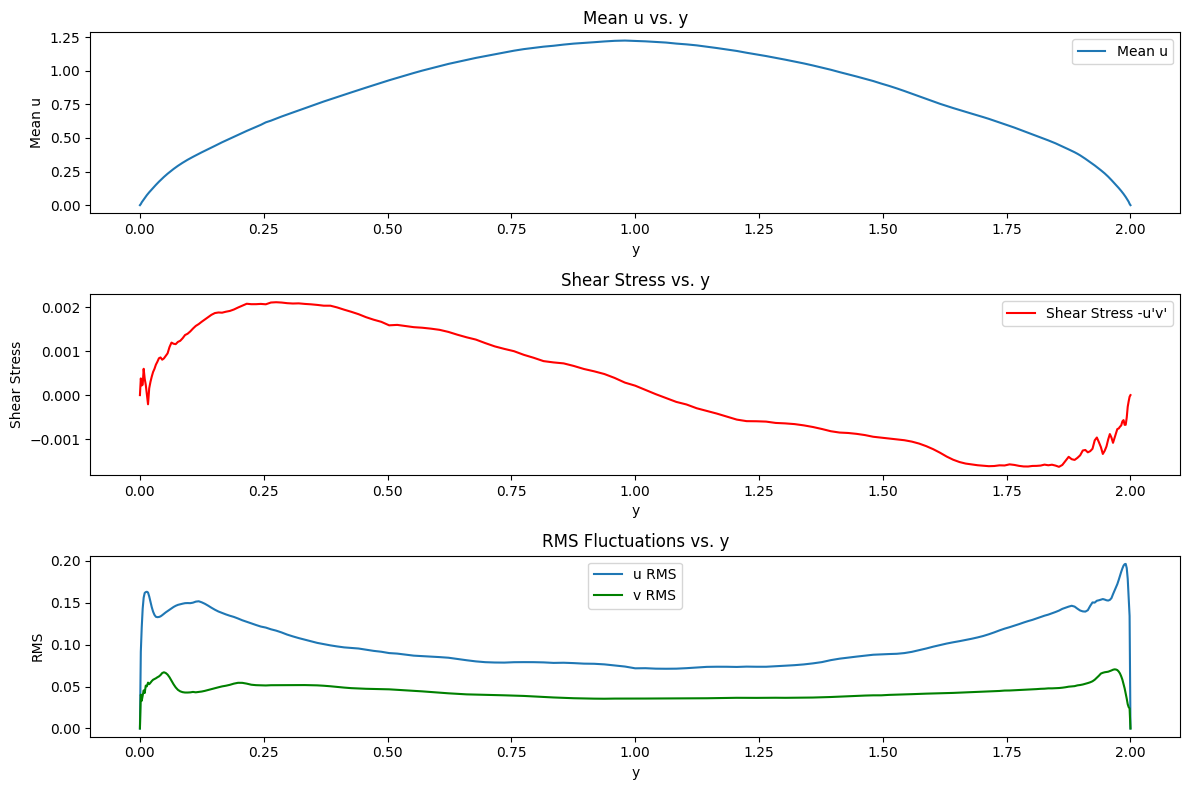

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(mean_u.index, mean_u, label='Mean u')
plt.title('Mean u vs. y')
plt.xlabel('y')
plt.ylabel('Mean u')
plt.legend()

plt.subplot(312)
plt.plot(shear_stress.index, shear_stress, color='red', label='Shear Stress -u\'v\'')
plt.title('Shear Stress vs. y')
plt.xlabel('y')
plt.ylabel('Shear Stress')
plt.legend()

plt.subplot(313)
plt.plot(u_rms.index, u_rms, label='u RMS')
plt.plot(v_rms.index, v_rms, label='v RMS', color='green')
plt.title('RMS Fluctuations vs. y')
plt.xlabel('y')
plt.ylabel('RMS')
plt.legend()

plt.tight_layout()
plt.show()